<a href="https://colab.research.google.com/github/kbd95/Deep-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
ROOT = "/content/drive/MyDrive/Ineuron"
os.chdir(ROOT)
assert ROOT == os.getcwd()

In [41]:
# Verify tensor installation -
import tensorflow as tf
from keras.optimizers import Adam

In [42]:
print(f"Tensorflow Version : {tf.__version__}")
print(f"Keras Version :{tf.keras.__version__}")

Tensorflow Version : 2.5.0
Keras Version :2.5.0


## GPU/CPU Check

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
checklist = ["GPU","CPU"]
for device in checklist:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) >0:
    print(f"{device} is available")
    print("dtails\n",out_)
  else:
    print(f"{device} not available")  

GPU is available
dtails
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
dtails
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

Working on mnist dataset -
This dataset contains handwritten digits.

It has 10 classes i.e. 0 to 9

Each data point is 2D array of 28x28 size.

Also known as hello world dataset for ANN

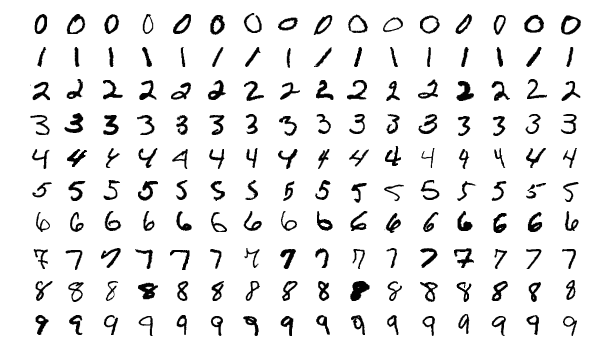

In [44]:
# Keras already contains mnist dataset
# Loading mnist data using keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [9]:
print(f"data type of X_train_full : {X_train_full.dtype},\nshape of X_train :{X_train_full.shape}")

data type of X_train_full : uint8,
shape of X_train :(60000, 28, 28)


uint8 is an unsigned 8-bit integer that can represent values 0.....255.

In [46]:
#Create validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

# scale the test set as well
#X_test = X_test/255.


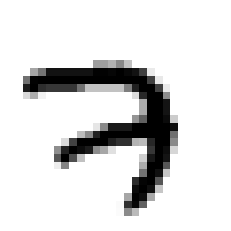

In [47]:
# Lets view the first datapoint of X_train
plt.imshow(X_train[0],cmap = "binary")
plt.axis("off")
plt.show()

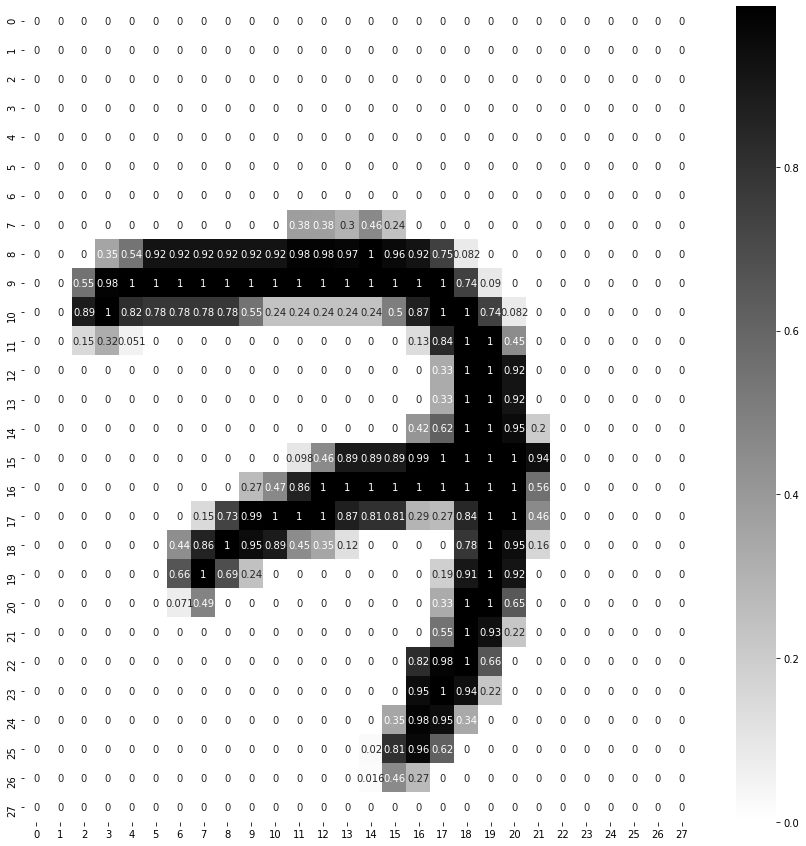

In [48]:
plt.figure(figsize= (15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [49]:
# actual value of y_train
y_train[0]

7

In [50]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(300,activation = "relu"),
                                    tf.keras.layers.Dense(100,activation="relu"),
                                    tf.keras.layers.Dense(10,activation = "softmax")

])

In [51]:
model.layers

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
# firstLayer * secondLayer +bias
784*300 +300, 300*100 +100, 100*10 +10

(235500, 30100, 1010)

In [54]:
# Total parameters to be trained - 
sum((235500,30100,1010))

266610

In [55]:
input_0 = model.layers[0]
input_0.name

'flatten_1'

In [56]:
hidden_1 = model.layers[1]
hidden_1.name

'dense_3'

In [57]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_4'

In [58]:
type(hidden_1.get_weights())

list

In [59]:
hidden_1.get_weights()

[array([[-0.06235879, -0.00622934, -0.02012987, ..., -0.00042725,
          0.05390006,  0.02867573],
        [ 0.00034153, -0.01180724, -0.00738282, ..., -0.06609114,
         -0.02115083, -0.06597896],
        [ 0.0601691 , -0.02210725,  0.0610328 , ..., -0.02940074,
          0.0253097 , -0.04488812],
        ...,
        [ 0.00549521,  0.02172749,  0.05759776, ..., -0.06871255,
          0.05908102, -0.01636659],
        [ 0.0473838 ,  0.04020327, -0.0493929 , ...,  0.01263467,
         -0.06702055,  0.04409537],
        [-0.02564903, -0.01428327, -0.05106643, ..., -0.04327508,
         -0.00522371,  0.02102172]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [60]:
weights,biases = hidden_1.get_weights()

In [61]:
print("shape\n",weights.shape,"\n")
weights

shape
 (784, 300) 



array([[-0.06235879, -0.00622934, -0.02012987, ..., -0.00042725,
         0.05390006,  0.02867573],
       [ 0.00034153, -0.01180724, -0.00738282, ..., -0.06609114,
        -0.02115083, -0.06597896],
       [ 0.0601691 , -0.02210725,  0.0610328 , ..., -0.02940074,
         0.0253097 , -0.04488812],
       ...,
       [ 0.00549521,  0.02172749,  0.05759776, ..., -0.06871255,
         0.05908102, -0.01636659],
       [ 0.0473838 ,  0.04020327, -0.0493929 , ...,  0.01263467,
        -0.06702055,  0.04409537],
       [-0.02564903, -0.01428327, -0.05106643, ..., -0.04327508,
        -0.00522371,  0.02102172]], dtype=float32)

In [62]:
print("shape\n",biases.shape)

shape
 (300,)


In [63]:
model.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])

In [64]:
EPOCHS = 30
VALIDATION_SET = (X_valid,y_valid)
history = model.fit(X_train,y_train,epochs = EPOCHS,
                    validation_data = VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4597 - accuracy: 0.8771 - val_loss: 0.2455 - val_accuracy: 0.9332
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2244 - accuracy: 0.9355 - val_loss: 0.1835 - val_accuracy: 0.9480
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1693 - accuracy: 0.9525 - val_loss: 0.1475 - val_accuracy: 0.9574
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.1238 - val_accuracy: 0.9654
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1129 - accuracy: 0.9677 - val_loss: 0.1135 - val_accuracy: 0.9662
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0957 - accuracy: 0.9726 - val_loss: 0.1046 - val_accuracy: 0.9686
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9764 - val_loss: 0.0910 - val_accuracy:

In [65]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [66]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_05_28_07_11_05_.h5


In [67]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [68]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.459684,0.877091,0.245515,0.9332
1,0.224397,0.935455,0.183497,0.9480
2,0.169350,0.952473,0.147494,0.9574
3,0.135954,0.960927,0.123760,0.9654
4,0.112861,0.967655,0.113544,0.9662
5,0.095735,0.972564,0.104584,0.9686
6,0.082816,0.976382,0.090962,0.9734
7,0.072077,0.979764,0.086869,0.9752
8,0.063129,0.982473,0.089641,0.9714
9,0.056074,0.984327,0.078861,0.9762


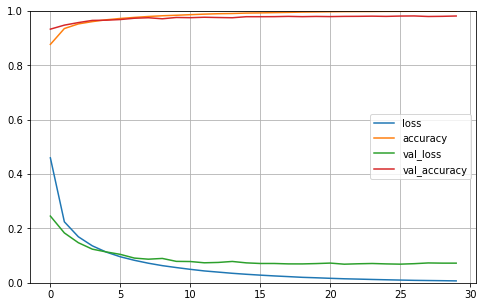

In [69]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [70]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.4730 - accuracy: 0.9782


[14.473021507263184, 0.9782000184059143]

In [71]:
X_new = X_test[:3]
y_proab = model.predict(X_new)
y_proab.round(0)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
y_pred = np.argmax(model.predict(X_new),axis = -1)
y_pred

array([7, 2, 1])

In [73]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

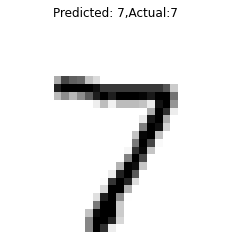

------------------------------------------------------------


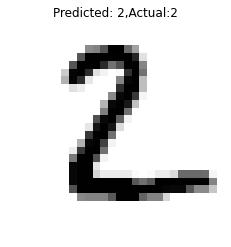

------------------------------------------------------------


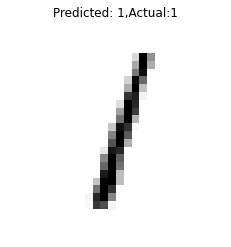

------------------------------------------------------------


In [74]:
for data, pred, actual in zip(X_new,y_pred,y_test_new):
  plt.imshow(data,cmap= "binary")
  plt.title(f"Predicted: {pred},Actual:{actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)